In [2]:
import os, sys
current = os.path.dirname(os.path.realpath('__file__'))
parent = os.path.dirname(current)
sys.path.append(parent)

import math
import copy
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from collections import Counter

from helpers import *  

### Question 3

In [43]:
def create_custom_network(N_0, m, n, selected_nodes=[]):
    """Creates an undirected network as defined in the question"""
    degrees_logs = [[] for _ in range(len(selected_nodes))]
    
    for i in range(len(N_0), n):
        existing_node = random.choices(list(N_0.keys()), k=1)[0]
        existing_node_neighbours = random.choices(list(N_0[existing_node]), k=m)
        N_0[i] = set(existing_node_neighbours)  # Add out-edges from new node
        for v in existing_node_neighbours: N_0[v].add(i)  # Add in-edges to new node

        # Preferential attachment analysis
        degrees = compute_degrees(N_0)
        if selected_nodes is not None:
            for selected_node, log in zip(selected_nodes, degrees_logs):
                if selected_node in N_0.keys():  # Selected node has already been added
                    log.append(degrees[selected_node])
                else:  # Selected node not yet been added to graph
                    log.append(0)

    return N_0, degrees_logs

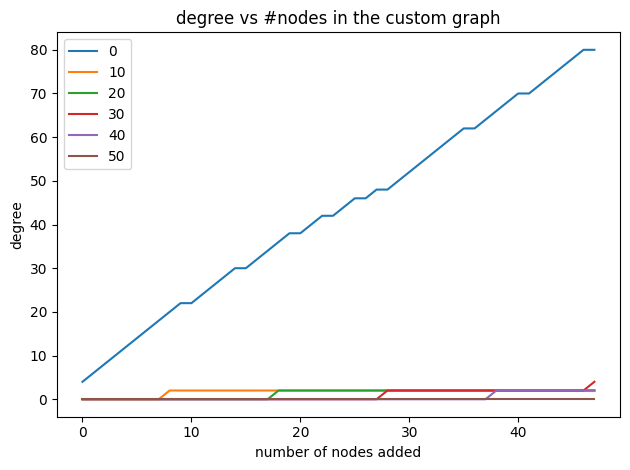

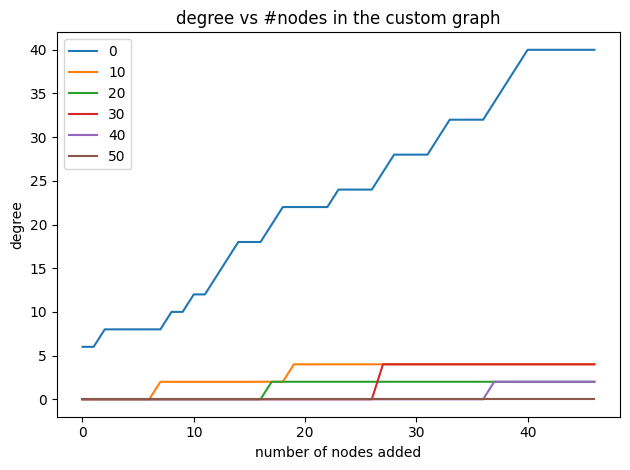

In [103]:
selected_nodes = [0,10,20,30,40,50]
network, degrees_logs = create_custom_network(make_complete_graph(2), 1, 50, selected_nodes)
fig1, ax1 = plt.subplots()
for i in range(len(degrees_logs)):
    plt.plot(range(len(degrees_logs[i])), degrees_logs[i], label=selected_nodes[i])
ax1.set_title("degree vs #nodes in the custom graph")
ax1.set_xlabel("number of nodes added")
ax1.set_ylabel("degree")
ax1.legend()
fig1.tight_layout()

selected_nodes = [0,10,20,30,40,50]
network, degrees_logs = create_custom_network(make_complete_graph(3), 2, 50, selected_nodes)
fig1, ax1 = plt.subplots()
for i in range(len(degrees_logs)):
    plt.plot(range(len(degrees_logs[i])), degrees_logs[i], label=selected_nodes[i])
ax1.set_title("degree vs #nodes in the custom graph")
ax1.set_xlabel("number of nodes added")
ax1.set_ylabel("degree")
ax1.legend()
fig1.tight_layout()

100%|██████████| 50/50 [00:00<00:00, 24972.04it/s]


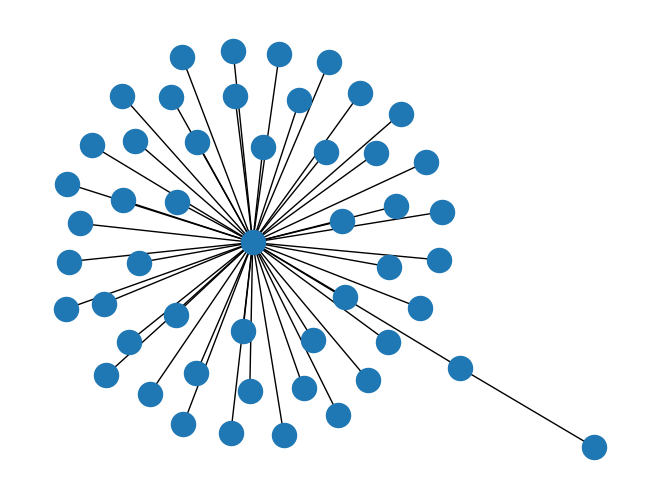

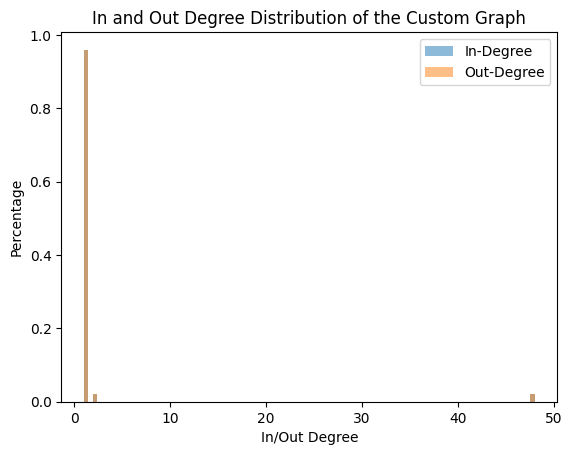

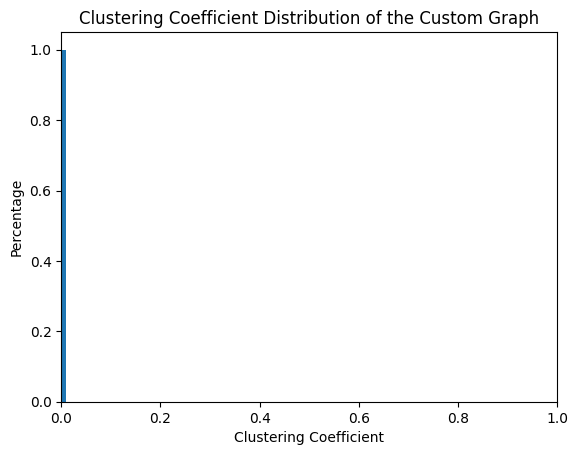

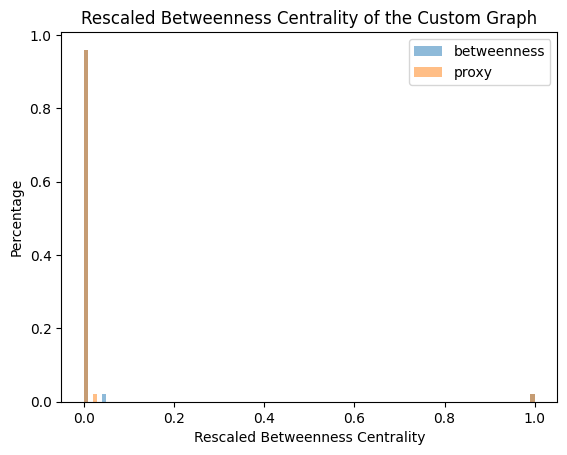

100%|██████████| 50/50 [00:00<00:00, 38248.26it/s]


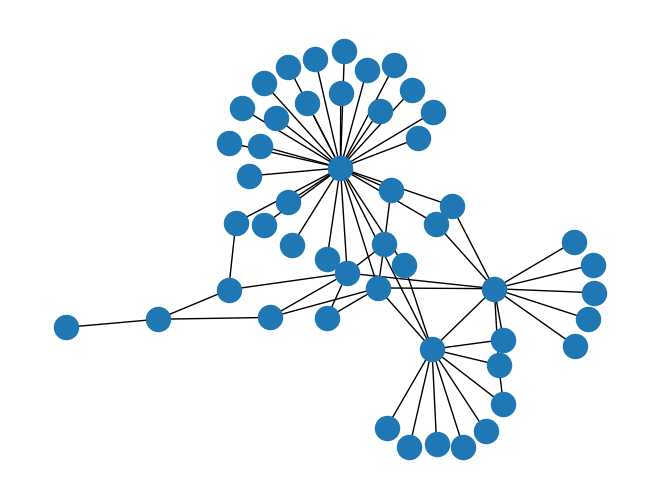

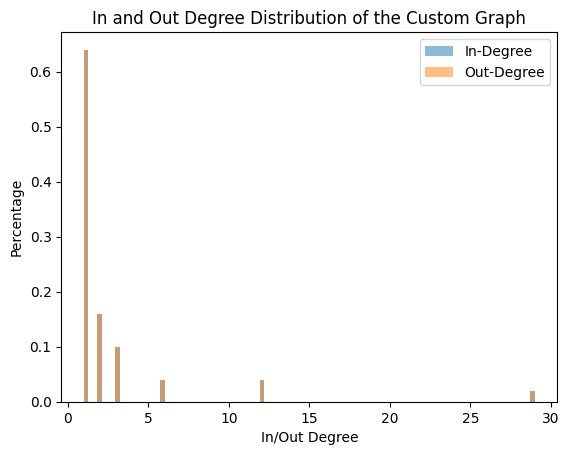

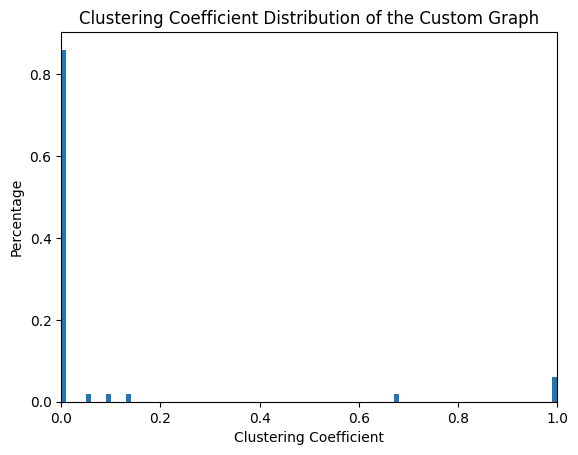

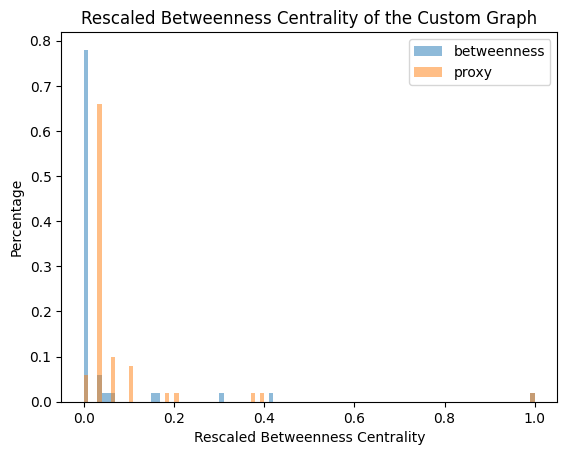

In [6]:
network = create_custom_network(make_complete_graph(2), 1, 50)
degrees = compute_degrees(network)  
neighbourhoods = compute_neighbourhoods(network)
clustering_coefficients = compute_local_clustering_coefficients(network, neighbourhoods, rounding=False)
betweenness_centrality = compute_betweenness_centrality(network)
proxy_betweenness_centrality = compute_proxy_betweenness_centrality(network)
normalised_betweenness_centrality = {k: (v-min(betweenness_centrality.values()))/(max(betweenness_centrality.values())-min(betweenness_centrality.values())) for k,v in betweenness_centrality.items()}
normalised_proxy_betweenness_centrality = {k: (v-min(proxy_betweenness_centrality.values()))/(max(proxy_betweenness_centrality.values())-min(proxy_betweenness_centrality.values())) for k,v in proxy_betweenness_centrality.items()}

g = nx.Graph(network)
nx.draw(g)
plt.show()

plt.hist(degrees.values(), bins=100, weights=np.ones(len(network))/len(network))
plt.title('Degree Distribution of the Custom Graph')
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.legend()
plt.show()

plt.hist(clustering_coefficients.values(), bins=100, weights=np.ones(len(network))/len(network))
plt.title('Clustering Coefficient Distribution of the Custom Graph')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Percentage')
plt.xlim([0, 1])
plt.show()

plt.hist(normalised_betweenness_centrality.values(), bins=100, alpha=0.5, label='betweenness', weights=np.ones(len(network))/len(network))
plt.hist(normalised_proxy_betweenness_centrality.values(), bins=100, alpha=0.5, label='proxy', weights=np.ones(len(network))/len(network))
plt.title('Rescaled Betweenness Centrality of the Custom Graph')
plt.xlabel('Rescaled Betweenness Centrality')
plt.ylabel('Percentage')
plt.legend()
plt.show()


network = create_custom_network(make_complete_graph(3), 2, 50)
degrees = compute_degrees(network)  
neighbourhoods = compute_neighbourhoods(network)
clustering_coefficients = compute_local_clustering_coefficients(network, neighbourhoods)
betweenness_centrality = compute_betweenness_centrality(network)
proxy_betweenness_centrality = compute_proxy_betweenness_centrality(network)
normalised_betweenness_centrality = {k: (v-min(betweenness_centrality.values()))/(max(betweenness_centrality.values())-min(betweenness_centrality.values())) for k,v in betweenness_centrality.items()}
normalised_proxy_betweenness_centrality = {k: (v-min(proxy_betweenness_centrality.values()))/(max(proxy_betweenness_centrality.values())-min(proxy_betweenness_centrality.values())) for k,v in proxy_betweenness_centrality.items()}

g = nx.Graph(network)
nx.draw(g)
plt.show()

plt.hist(degrees.values(), bins=100, weights=np.ones(len(network))/len(network))
plt.title('Degree Distribution of the Custom Graph')
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.legend()
plt.show()

plt.hist(clustering_coefficients.values(), bins=100, weights=np.ones(len(network))/len(network))
plt.title('Clustering Coefficient Distribution of the Custom Graph')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Percentage')
plt.xlim([0, 1])
plt.show()

plt.hist(normalised_betweenness_centrality.values(), bins=100, alpha=0.5, label='betweenness', weights=np.ones(len(network))/len(network))
plt.hist(normalised_proxy_betweenness_centrality.values(), bins=100, alpha=0.5, label='proxy', weights=np.ones(len(network))/len(network))
plt.title('Rescaled Betweenness Centrality of the Custom Graph')
plt.xlabel('Rescaled Betweenness Centrality')
plt.ylabel('Percentage')
plt.legend()
plt.show()